In [ ]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.7/dist-packages (0.24.2)


# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [ ]:
# loading data
from sklearn.datasets import load_boston

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
boston=load_boston()

In [ ]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [ ]:
# price column lies in the boston.target object
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [ ]:
data=boston.data

In [ ]:
data.shape

(506, 13)

In [ ]:
data = pd.DataFrame(data=data, columns=boston.feature_names)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
data['Price']=boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Understand the data

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

# Data Visualization

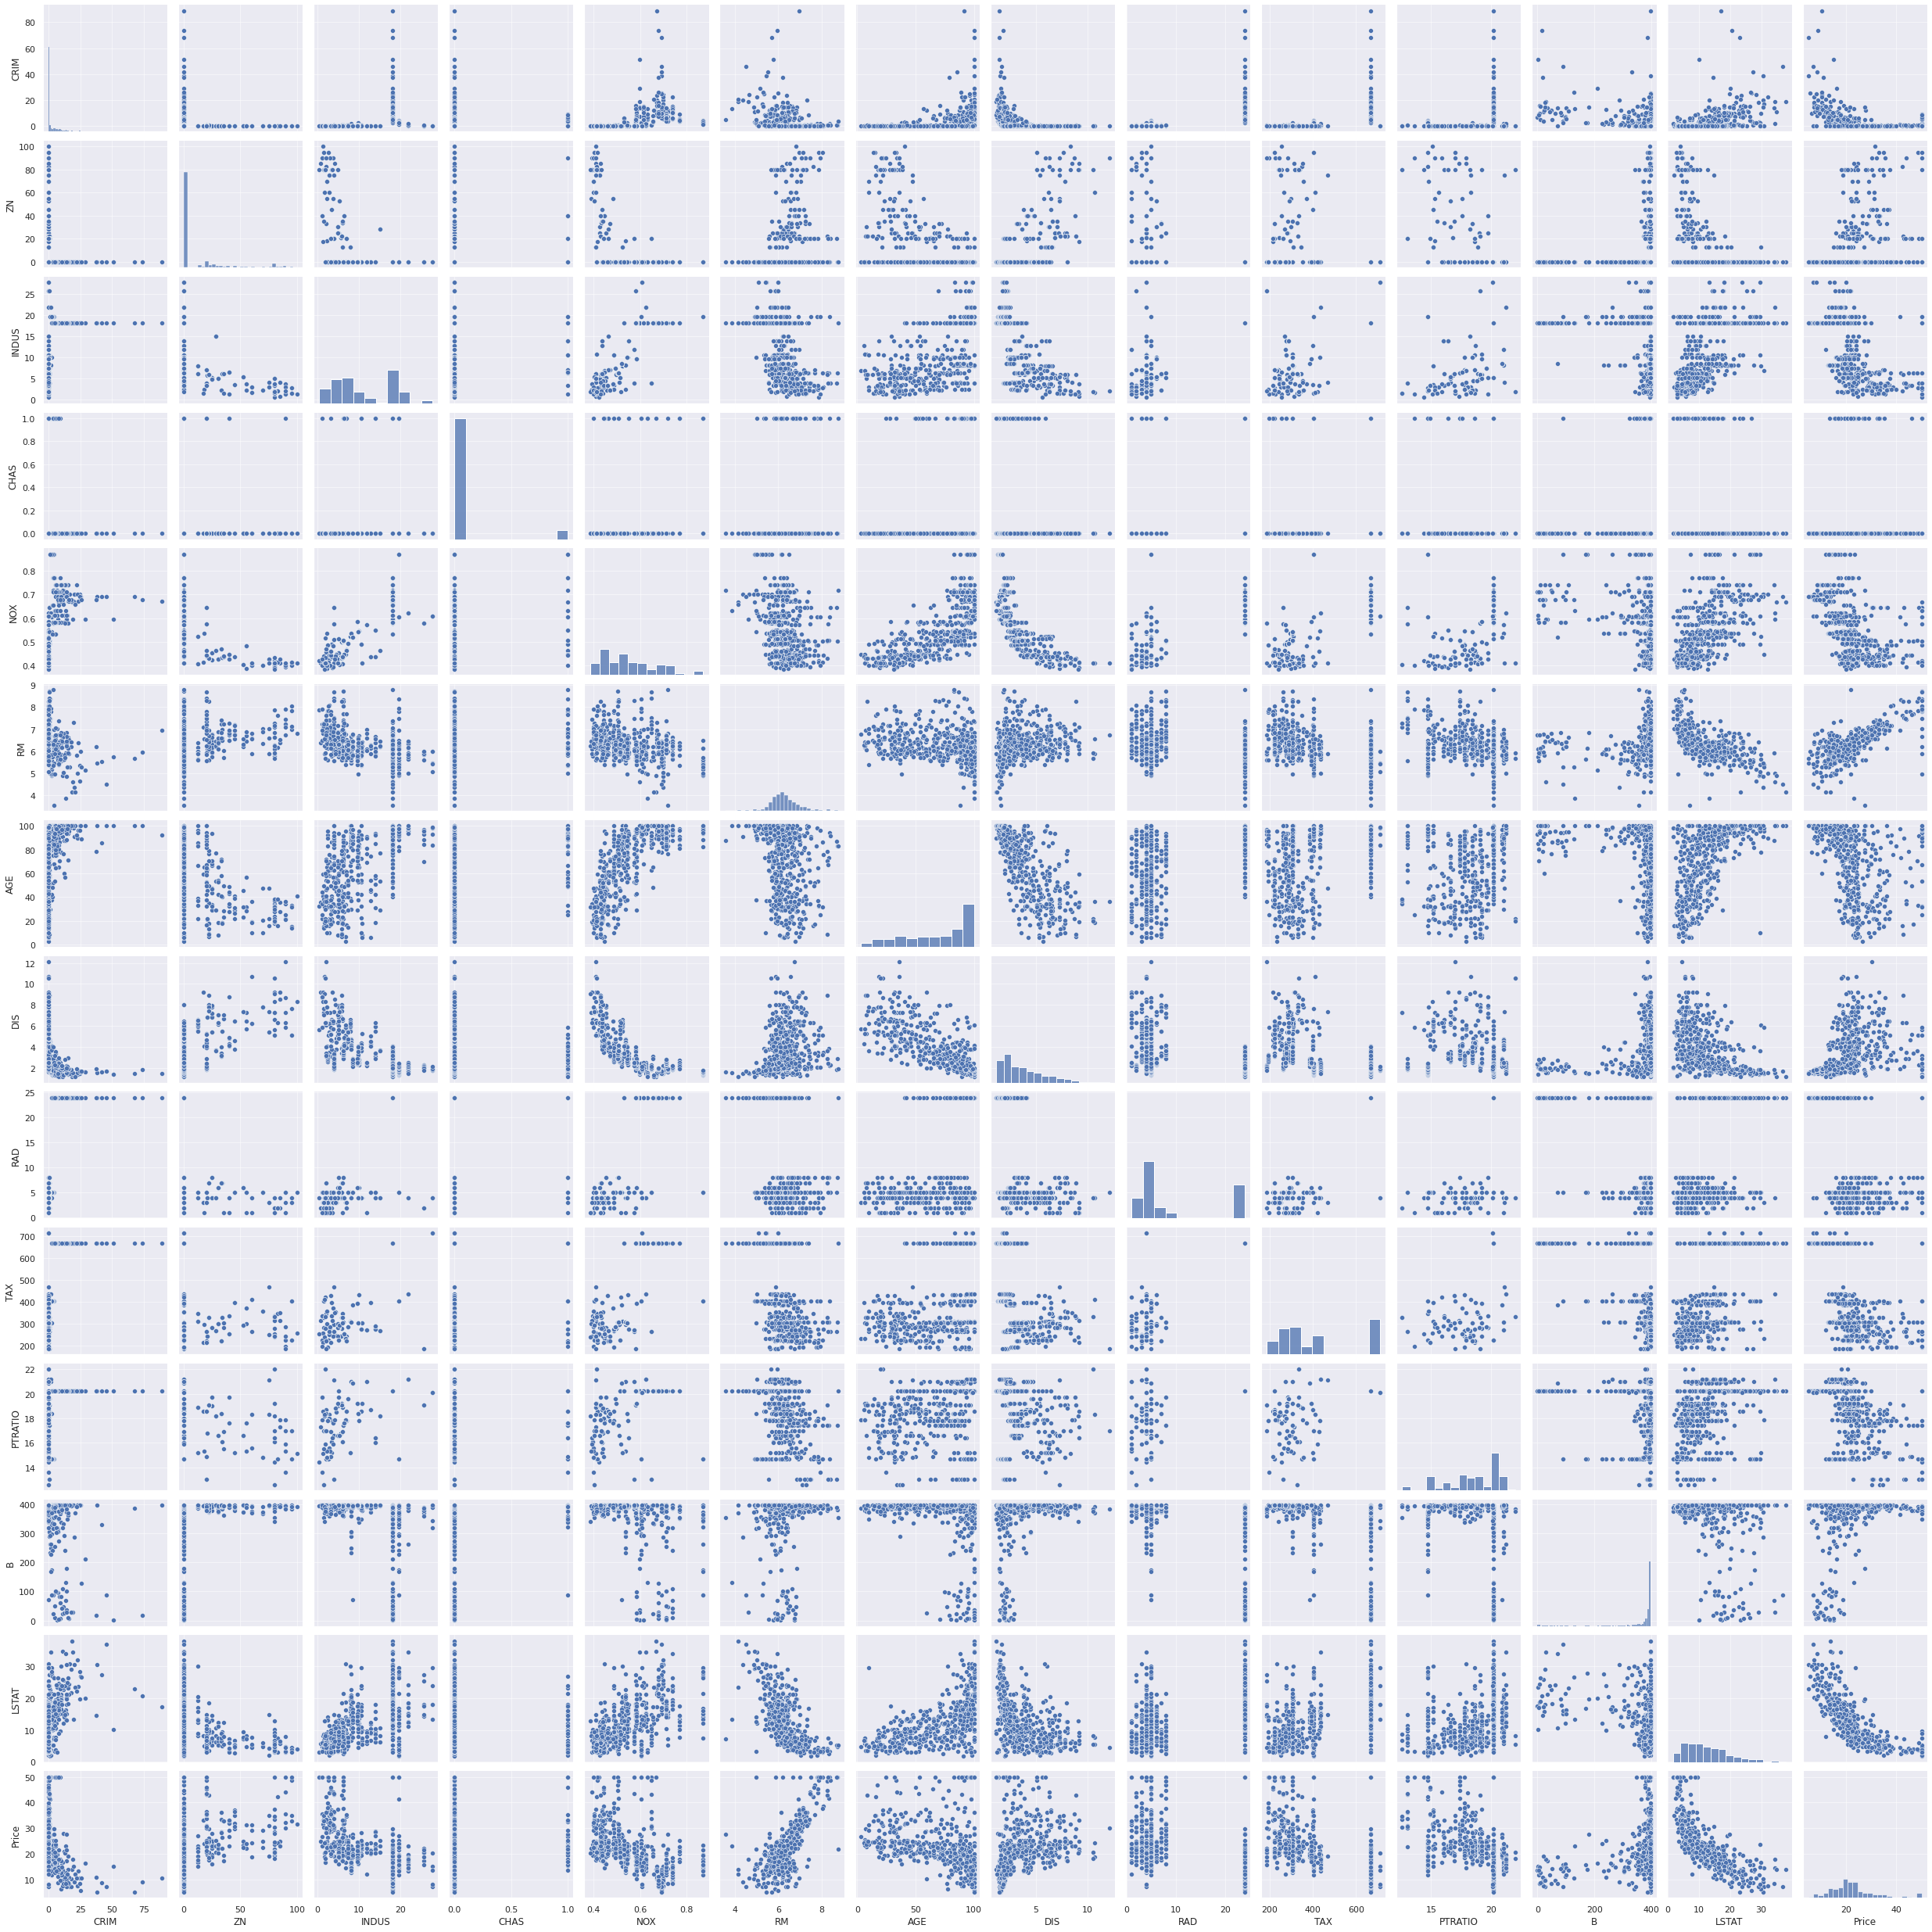

In [ ]:
# plotting the relation between the features
sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

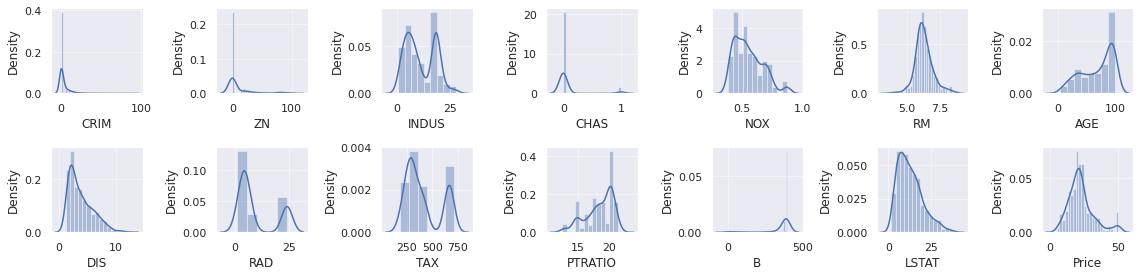

In [ ]:
#implementing distribution plot
rows=2
cols=7

fig,ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

col=data.columns
index=0

for i in range(rows):
  for j in range(cols):
    sns.distplot(data[col[index]],ax=ax[i][j])
    index = index+1

plt.tight_layout()

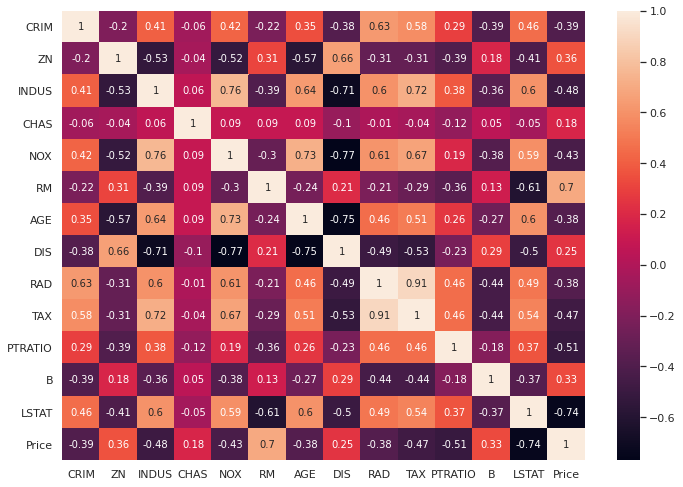

In [ ]:
#corelation heat map
bos_1=pd.DataFrame(boston.data, columns=boston.feature_names)

correlation_matrix=data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, annot_kws={'size':10})

In [ ]:
#selecting those features whose corelianity is high with dependent to only price
def getCorelatedFeature(corrdata, threshold):
  feature=[]
  value=[]

  for i, index in enumerate(corrdata.index):
    if abs(corrdata[index]) > threshold:
      feature.append(index)
      value.append(corrdata[index])

  df=pd.DataFrame(data=value, index=feature, columns=['Corr Value'])
  return df

In [ ]:
threshold=0.5
corr_value=getCorelatedFeature(correlation_matrix['Price'],threshold)
corr_value

,Corr Value
RM,0.70
PTRATIO,-0.51
LSTAT,-0.74
Price,1.00


In [ ]:
correlated_data=data[corr_value.index]
correlated_data.head()

,RM,PTRATIO,LSTAT,Price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


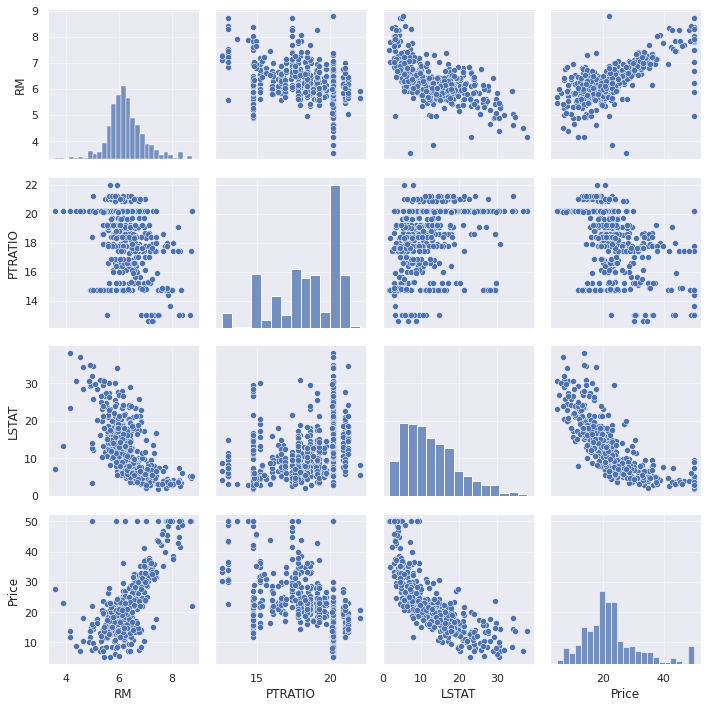

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

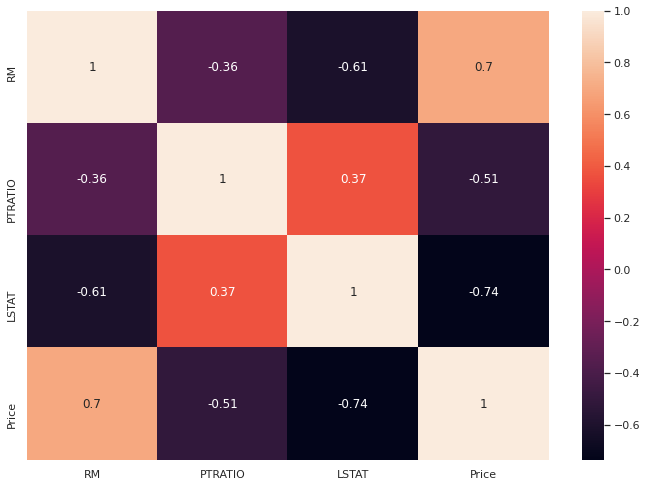

In [ ]:
sns.heatmap(correlated_data.corr(), annot=True)

# Shuffle and Split Data

In [ ]:
X=correlated_data.drop(labels=['Price'],axis=1)
y=correlated_data['Price']
X.head()

,RM,PTRATIO,LSTAT
0,6.575,15.3,4.98
1,6.421,17.8,9.14
2,7.185,17.8,4.03
3,6.998,18.7,2.94
4,7.147,18.7,5.33


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape, X_test.shape

((404, 3), (102, 3))

# Train Model

In [ ]:
model=LinearRegression(normalize=True)
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
y_predict, y_test

(array([27.60903054, 22.09903399, 26.52925454, 12.50798575, 22.25487898,
        20.17063891, 19.66763431, 21.17945215, 17.05361787, 21.47645249,
        14.61188065, 17.25203106, 17.87834594,  4.63763054, 39.49396811,
        34.51171811, 21.51354177, 38.44114322, 30.01522647, 22.1120067 ,
        25.01756609, 25.47821806, 18.29949317, 27.53525285, 22.04425617,
         9.8766314 , 17.64455251, 22.58495171, 35.56415926, 19.94695236,
        17.07488901, 18.54782062, 23.03506219, 24.0227991 , 27.32559903,
        17.39669651, 11.20037267, 21.01877579, 17.99452878, 13.48338053,
        27.03969738, 20.22025653, 25.79579308, 13.77875148, 28.87448892,
        25.92551494, 21.42412497, 24.76182896, 11.37786561, 23.54614643,
        24.91747489, 16.26246249, 23.05899832, 35.50989662, 14.52731963,
        22.83041034, 22.00550472, 20.52680975, 19.80762071, 18.37114766,
        23.84391837, 21.86386107, 32.71351223, 30.0351469 , 16.94378867,
        32.09219353, 19.25207073, 22.18373343, 18.9

In [ ]:
df = pd.DataFrame(data=[y_predict,y_test])
df.T

,0,1
0,27.609031,22.6
1,22.099034,50.0
2,26.529255,23.0
3,12.507986,8.3
4,22.254879,21.2
...,...,...
97,28.271228,24.7
98,18.467419,14.1
99,18.558070,18.7
100,24.681964,28.1


# Performance Metrics

In [ ]:
from sklearn.metrics import r2_score

# r2 score of 1 is desirable

In [ ]:
score = r2_score(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)

print("r2 score: ", score)
print("mea: ", mae)
print("mse: ", mse)

r2 score:  0.48816420156925067
mea:  4.404434993909257
mse:  41.67799012221683


# Store feature performance

In [ ]:
# storing the performance metrics so that we can compare between the selected features
total_features=[]
total_features_name=[]
selected_correlation_value=[]
r2_scores=[]
mae_value=[]
mse_value=[]

In [ ]:
def performance_metrics(features, th, y_true, y_pred):
  score = r2_score(y_true, y_pred)
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)

  total_features.append(len(features)-1)
  total_features_name.append(str(features))
  selected_correlation_value.append(th)
  r2_scores.append(score)
  mae_value.append(mae)
  mse_value.append(mse)

  metrics_dataframe=pd.DataFrame(data=[total_features_name,total_features,selected_correlation_value,r2_scores,mae_value,mse_value], index=['feature names','#feature', 'corr_value', 'r2_score', 'MAE', 'MSE'])

  return metrics_dataframe.T

In [ ]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,feature names,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678


# Regression Plot

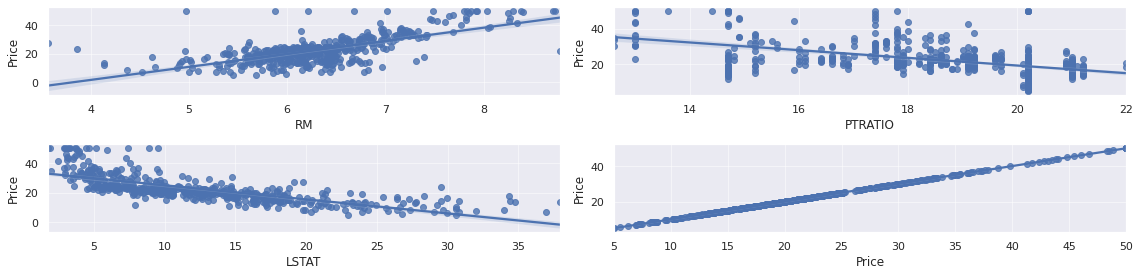

In [ ]:
rows=2
cols=2

fig,ax=plt.subplots(nrows=rows, ncols=cols, figsize=(16,4))

col=correlated_data.columns
index=0

for i in range(rows):
  for j in range(cols):
    sns.regplot(x=correlated_data[col[index]], y=correlated_data['Price'],ax=ax[i][j])
    index=index+1

plt.tight_layout()

# Selecting columns for better accuracy with threshold > 60%

In [ ]:
correlation_matrix['Price']

CRIM      -0.39
ZN         0.36
INDUS     -0.48
CHAS       0.18
NOX       -0.43
RM         0.70
AGE       -0.38
DIS        0.25
RAD       -0.38
TAX       -0.47
PTRATIO   -0.51
B          0.33
LSTAT     -0.74
Price      1.00
Name: Price, dtype: float64

In [ ]:
threshold=0.60
corr_value=getCorelatedFeature(correlation_matrix['Price'], threshold)
corr_value

,Corr Value
RM,0.70
LSTAT,-0.74
Price,1.00


In [ ]:
correlated_data=data[corr_value.index]
correlated_data.head()

,RM,LSTAT,Price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [ ]:
def get_y_predict(corr_data):
  X=corr_data.drop(labels=['Price'],axis=1)
  y=corr_data['Price']

  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

  model = LinearRegression()
  model.fit(X_train, y_train)
  y_predict=model.predict(X_test)

  return y_predict

In [ ]:
y_predict=get_y_predict(correlated_data)

In [ ]:
performance_metrics(correlated_data.columns.values,threshold,y_test, y_predict)

,feature names,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831


# Selecting columns for better accuracy with threshold > 70%

In [ ]:
threshold=0.70
corr_value=getCorelatedFeature(correlation_matrix['Price'], threshold)
corr_value

,Corr Value
LSTAT,-0.74
Price,1.00


In [ ]:
correlated_data=data[corr_value.index]
correlated_data.head()

,LSTAT,Price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [ ]:
y_predict=get_y_predict(correlated_data)

In [ ]:
performance_metrics(correlated_data.columns.values,threshold,y_test, y_predict)

,feature names,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363


# Selecting only RM

In [ ]:
correlated_data=data[['RM', 'Price']]
correlated_data.head()

,RM,Price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [ ]:
y_predict=get_y_predict(correlated_data)

In [ ]:
performance_metrics(correlated_data.columns.values,threshold,y_test, y_predict)

,feature names,#feature,corr_value,r2_score,MAE,MSE
0,['RM' 'PTRATIO' 'LSTAT' 'Price'],3,0.5,0.488164,4.40443,41.678
1,['RM' 'LSTAT' 'Price'],2,0.6,0.540908,4.14244,37.3831
2,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
3,['LSTAT' 'Price'],1,0.7,0.430957,4.86401,46.3363
4,['RM' 'Price'],1,0.7,0.423944,4.32474,46.9074
